# What is dancehall?

Wikipedia defines dancehall as: a genre of Jamaican popular music that originated in the late 1970s.[2] Initially, dancehall was a more sparse version of reggae than the roots style, which had dominated much of the 1970s.[3][4] In the mid-1980s, digital instrumentation became more prevalent, changing the sound considerably, with digital dancehall (or "ragga") becoming increasingly characterized by faster rhythms. Key elements of dancehall music include its extensive use of Jamaican Patois rather than Jamaican standard English and a focus on the track instrumentals (or "riddims"). 

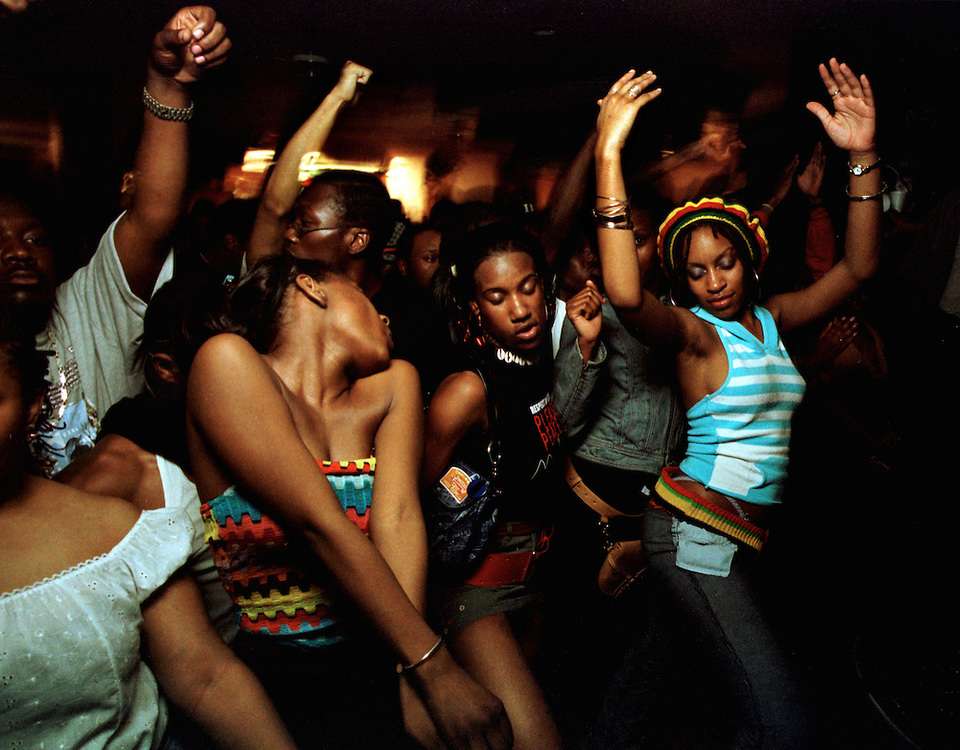

In [2]:
from IPython.display import Image
Image("img/dancehall-2.jpg")

# What is our EDA?

Jonathan Bair and I used the Genius API along with several python packages to scrape the top 20 songs from 17 different Jamaican dancehall artists and performed similar exploratory data analysis to what was done here: http://www.degeneratestate.org/posts/2016/Apr/20/heavy-metal-and-natural-language-processing-part-1/

# Dancehallness of Lyrics

Here we try to compare the frequency of terms in dancehall in ratio to the frequency of terms in the average English corpus. For English we use the Brown corpus. The equation we use for the comparison is as such:

$$D_w=log\frac{N_w^{Dancehall}}{N_w^{Brown}}$$

## Top Twenty

In [135]:
top_ten=sorted_by_value[-21:-1]
top_ten.reverse()
top_ten

[('girl', 3.845408256346162),
 ('woman', 3.531250509910353),
 ('say', 3.5173688134241976),
 ('eye', 3.4468078929142076),
 ('tell', 3.399111875171134),
 ('heart', 3.3250360206965914),
 ('watch', 3.289644895756408),
 ('friend', 3.288401887516811),
 ('know', 3.2744456760230114),
 ('like', 3.2386784521643803),
 ('dead', 3.1832486472250494),
 ('drop', 3.164067588373206),
 ('hold', 3.126760535960395),
 ('want', 3.0995290672356344),
 ('go', 2.924185122261943),
 ('thing', 2.90507790528586),
 ('come', 2.8972922007407385),
 ('stop', 2.849880396541428),
 ('send', 2.833213344056216),
 ('hot', 2.833213344056216)]

## Bottom Twenty

In [136]:
bottom_ten=sorted_by_value[:21]
bottom_ten

[('state', -2.72785282839839),
 ('said', -2.7105162935974034),
 ('american', -2.2587824703356527),
 ('week', -2.0583881324820035),
 ('may', -2.0476928433652555),
 ('men', -1.9042374526547454),
 ('march', -1.8971199848858813),
 ('last', -1.8439452223986252),
 ('along', -1.8191584434161694),
 ('made', -1.7824570765657415),
 ('law', -1.742969305058623),
 ('foreign', -1.6650077635889111),
 ('special', -1.6582280766035324),
 ('york', -1.6486586255873816),
 ('began', -1.580450375560848),
 ('four', -1.5735059032080372),
 ('john', -1.5353299402803784),
 ('would', -1.535039622380241),
 ('second', -1.491654876777717),
 ('present', -1.455287232606842),
 ('million', -1.4087672169719492)]

# Word Clouds

## Overall Set

(-0.5, 399.5, 199.5, -0.5)

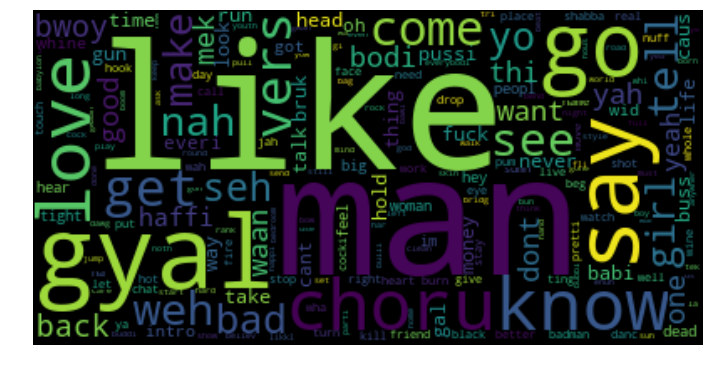

In [139]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


## Reduced Set- Alkalline, Masicka, Vybz Kartel

(-0.5, 399.5, 199.5, -0.5)

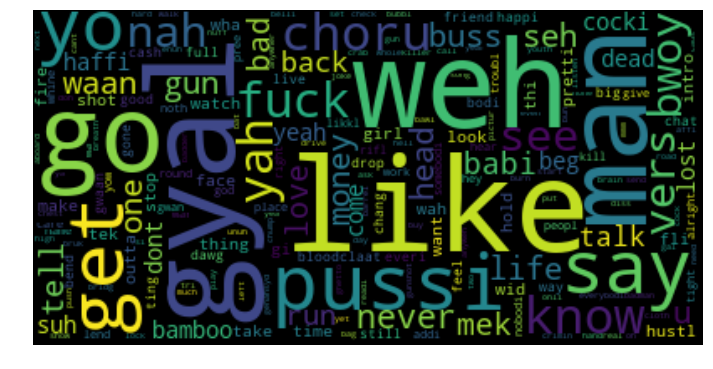

In [152]:
wordcloud = WordCloud().generate_from_frequencies(reduced_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Artist by Artist

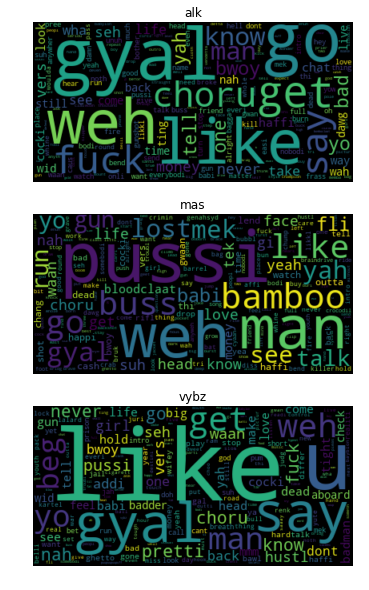

In [153]:
fig, axs = plt.subplots(nrows=3, ncols=1)
c=0
for i in band_freq.keys():
    wordcloud = WordCloud().generate_from_frequencies(band_freq[i])
    axs[c].set_title(i)
    axs[c].imshow(wordcloud, interpolation='bilinear')
    axs[c].axis("off")
    c+=1

There seems to be some difficulty in saying which artist is which without the labels, they seem very similar. "Like", "gyal", "life" and "say" are pretty common between all. We can use a log-likelihood measure to differentiate between them.

## Log Likelihood

Say we assumed that the probability that any word comes from one artist is binomially distributed. We can create a measure that weights words peculiar to one artist highly. The equation we use is:
$$L_w=N_w log \frac{N_w}{E_w}+\bar{N_w}log\frac{\bar{N_w}}{\bar{E_w}}$$
where $N_w$ is the number of times a word appears in one artists corpus, $E_w$ is the expected value of that frequency across artists, and all quantities that have bars represent equivalent values but for all other words.

The word clouds weighted by log-likelihood look like this:

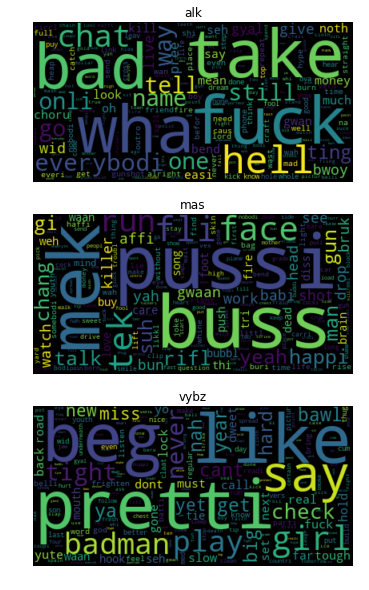

In [158]:
fig, axs = plt.subplots(nrows=3, ncols=1)
c=0
for i in band_freq.keys():
    wordcloud = WordCloud().generate_from_frequencies((log_like[i]).to_dict())
    axs[c].set_title(i)
    axs[c].imshow(wordcloud, interpolation='bilinear')
    axs[c].axis("off")
    c+=1